# Trabajo 2 Fotonica

## Librerías y modulos:

Librerias de python a usar:

In [1]:
import numpy as np
import scipy.special as sp
import scipy.optimize as sp2
import matplotlib.pyplot as plt
import pandas as pd

Modulos propios en el documento:

In [2]:
from core_refractive_index import *
from q1yq2 import *
from TE_TM import *
from Zeros import *
from HE import *
from EH import *

## Planteamiento del problema:

Encontrar todos los posibles modos que se pueden propagar en la fibra óptica Corning SMF-28, para una longitud de onda incidente de $1\mu m$. Para el índice de refracción del revestimiento, tomar como material sílice pura (SiO2 ) y para el núcleo, sílice dopada con GeO2 al 4.2 mol%.

Para obtener todos los datos necesarios para el modelamiento de los modos que se pueden propagar, se hallan los indices de refracción a través de la ecuación de Sellmeier:

$$n(\lambda)= \sqrt{1 + \sum_{i=1}^{M} A_{i} \frac{\lambda^{2}}{\lambda^{2}-\lambda_{i}^{2}}}$$

Para la realización de estos calculos se uso el articulo To the use of Sellmier formula, que contenía los valores correspondientes a los primeros coeficientes de Sellmier para el SiO2 (**calculo en modulo core_refractive_index**}  y una tabla de silice dopado para GeO2 (**Calculo en archivo de matlab**). Y se obtuvieron los siguientes resultados:

In [3]:
print('Indice de refracción del nucleo: ', n_core())

Indice de refracción del nucleo:  1.4568527308462205


In [4]:
print('Indice de refracción del revestimiento: ', n_cladding())

Indice de refracción del revestimiento:  1.450417399464332


Como último dato necesario para el calculo de los modos de propagación de la onda en la fibra óptica, es necesario conocer el radio de la misma, según su hojade datos posee un diametro de $8.2 \mu m$ en el nucleo, por tanto los datos completo serían:

$$a = 4.1 \mu m$$
$$n_{co} = 1.45685$$
$$n_{cl} = 1.45042$$
$$\lambda_{0} = 1 \mu m$$

## Modos TE y TM

Siendo estos indices de refracción muy cercanos, se trata de una situación de guiado debil, por tanto la ecuación de dispersión para los modos TE y TM esta dada por (**contenida en el modulo TE_TM**): 

$$q_{1} \frac{J_{0}(q_{1}a)}{J_{1}(q_{1}a)}=- q_{2} \frac{K_{0}(q_{2}a)}{K_{1}(q_{2}a)}$$

Donde $q_{1}$ y $q_{2}$ (**Conteidas en el modulo "q1yq2", con un factor de escala de 10⁶**) son respectivamente:

$$q_{1} = \sqrt{n_{co}^{2} k_{0}^{2} - \beta^{2}}$$
$$q_{2} = \sqrt{\beta^{2} - n_{cl}^{2} k_{0}^{2}}$$

Por tanto:

$$k_{0}n_{cl} < \beta < k_{0}$$

In [5]:
print(r'El rango de beta es: (', ko*ncl, ',', ko*nco, ')')

El rango de beta es: ( 9113241.293591917 , 9153675.67317743 )


Sabiendo que los ceros de la función se encuentran en la resta de las funciones:

$$f(\beta) = q_{1} \frac{J_{0}(q_{1}a)}{J_{1}(q_{1}a)}$$
$$g(\beta) = - q_{2} \frac{K_{0}(q_{2}a)}{K_{1}(q_{2}a)}$$

Se grafican estas funciones para tener conomiento del numero modos TE y TM y su ubicación:

In [6]:
xx = np.linspace(9.114,9.1527,100)
yy = tm_te(xx)
yy1 = tm_te_01(xx)
yy2 = tm_te_02(xx)

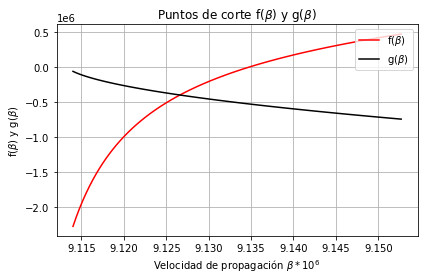

In [7]:
fig, ax = plt.subplots()
#ax.plot(xx,yy, label='S(b)', color='black')
ax.plot(xx,yy1, label=r'f($\beta$)', color='red')
ax.plot(xx,yy2, label=r'g($\beta$)', color='black')
ax.set(xlabel=r'Velocidad de propagación $\beta * 10^{6}$', ylabel=r'f($\beta$) y g($\beta$)',
title=r'Puntos de corte f($\beta$) y g($\beta$)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Puntos de corte TE y TM.png')
plt.show()

Solo existe un modo TE y un modo TE, el fundamental, por tanto se puede aplicar el metodo de bisección sobre todo el dominio de la función para hallarlo:

In [8]:
tm_te_zeros = sp2.bisect(tm_te,9.114,9.1527)
neff_TE_TM = (tm_te_zeros / ko) * (10 ** 6)
print('El modo fundamental TE y TM posee una velocidad de propagación de: ', tm_te_zeros, 'con un indice de refracción efectivo: ', neff_TE_TM)

El modo fundamental TE y TM posee una velocidad de propagación de:  9.126608230777013 con un indice de refracción efectivo:  1.452544813591339


Estonces:

$$TE_{01}: n_{eff} =  1.452544813591339$$
$$TM_{01}: n_{eff} =  1.452544813591339$$

## Modos HE

La ecuación de dispersión para los modos HE en guiado debil (**Contenida en el modulo HE**):

$$q_{1} \frac{J_{v}(q_{1}a)}{J_{v-1}(q_{1}a)} = q_{2} \frac{K_{v}(q_{2}a)}{K_{v-1}(q_{2}a)}$$

Por tanto, al graficar las funciones: 

$$h(v,\beta) = q_{1} \frac{J_{v}(q_{1}a)}{J_{v-1}(q_{1}a)}$$
$$i(v,\beta) = q_{2} \frac{K_{v}(q_{2}a)}{K_{v-1}(q_{2}a)}$$

Podemos saber la ubicación de sus raices en los puntos de corte, tomando valores discretos de $v:1,2,3 ...$.

Primeramente graficando los puntos de corte para el modo angular uno:

In [9]:
xxx = np.linspace(9.114,9.1527,100)
yyy = HE(1,xxx)
yyy1 = HE_01(1,xxx)
yyy2 = HE_02(1,xxx)

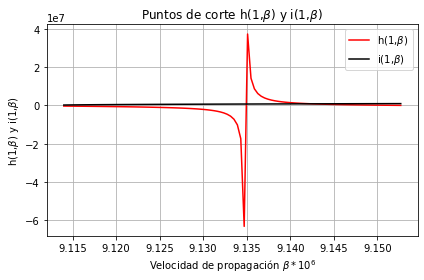

In [10]:
fig, ax = plt.subplots()
#ax.plot(xxx,yyy, label='S(b)', color='green')
ax.plot(xxx,yyy1, label=r'h(1,$\beta$)', color='red')
ax.plot(xxx,yyy2, label=r'i(1,$\beta$)', color='black')
ax.set(xlabel=r'Velocidad de propagación $\beta * 10^{6}$', ylabel=r'h(1,$\beta$) y i(1,$\beta$)',
title=r'Puntos de corte h(1,$\beta$) y i(1,$\beta$)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Puntos de corte HE_v1.png')
plt.show()

Se observa que posiblemente hayan dos modos radiales, uno anterior a $9.130 * 10^{6}$ y otro posterior a $9.140 * 10^{6}$.

Al evaluar el primer caso, obtenemos que no existe un cambio de signo en la función, ya que en el extremo izquiero la función toma el valor de:

In [11]:
HE(1,9.13)

-2724002.050815152

Y en el extremo derecho:

In [12]:
HE(1,9.113241293591917)

-302526.90651117824

POr tanto, no existe ninguna raíz para valores inferiores a a $9.130 * 10^{6}$. Además, entre $9.130 * 10^{6}$ y $9.140 * 10^{6}$ parece existir un cero, sin embargo, por la forma de la función se puede saber que se trata de una discontinuidad. Por último, entre $9.140 * 10^{6}$ y $9.150 * 10^{6}$ se puede notar en la grafica que sí existe un cero, por tanto, lo hallamos por el metodo de bisección, que correspondería al modo $HE_{11}$.

In [13]:
def HE_v1(beta):
    HE_v1 = HE(1,beta)
    return HE_v1


HE_zeros_11 = sp2.bisect(HE_v1,9.140,9.150)
print('Velocidad de propagación modo HE11: ', HE_zeros_11)

Velocidad de propagación modo HE11:  9.142541820110056


Realizamos el mismo procedimiento para el modo angular $v=2$:

In [14]:
xxx_v2 = np.linspace(9.114,9.1527,100)
yyy_v2 = HE(2,xxx_v2)
yyy1_v2 = HE_01(2,xxx_v2)
yyy2_v2 = HE_02(2,xxx_v2)

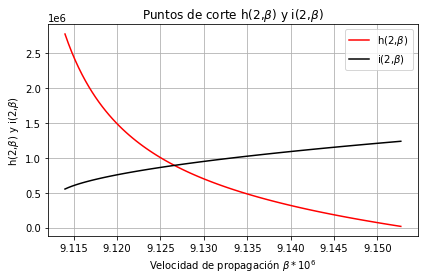

In [22]:
fig, ax = plt.subplots()
#ax.plot(xxx,yyy, label='S(b)', color='green')
ax.plot(xxx_v2,yyy1_v2, label=r'h(2,$\beta$)', color='red')
ax.plot(xxx_v2,yyy2_v2, label=r'i(2,$\beta$)', color='black')
ax.set(xlabel=r'Velocidad de propagación $\beta * 10^{6}$', ylabel=r'h(2,$\beta$) y i(2,$\beta$)',
title=r'Puntos de corte h(2,$\beta$) y i(2,$\beta$)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Puntos de corte HE_v2.png')
plt.show()

Se puede observar claramente una raíz, correspondiente al modo $HE_{21}$. Hallando dicho cero:

In [16]:
def HE_v2(beta):
    HE_v2 = HE(2,beta)
    return HE_v2

HE_zeros_21 = sp2.bisect(HE_v2,9.114,9.150)
print('Velocidad de propagación modo HE21: ', HE_zeros_21)

Velocidad de propagación modo HE21:  9.12660823077767


In [17]:
neff_HE_11 = (HE_zeros_11 / ko) * (10 ** 6)
neff_HE_21 = (HE_zeros_21 / ko) * (10 ** 6)
print('El modo de propagación HE11 posee una velocidad de propagación de: ', HE_zeros_11, 'y el modo de propagación HE21 posee una velocidad de propagación de: ' , HE_zeros_21 , 'con un indices de refracción efectivo respectivamente: ', neff_HE_11, 'y', neff_HE_21)

El modo de propagación HE11 posee una velocidad de propagación de:  9.142541820110056 y el modo de propagación HE21 posee una velocidad de propagación de:  9.12660823077767 con un indices de refracción efectivo respectivamente:  1.455080723094889 y 1.4525448135914436


Estonces: 

$$HE_{11}: n_{eff} = 1.455080723094889$$
$$HE_{21}: n_{eff}= 1.4525448135914436$$

Volvemos a realizar el mismo procedimiento para el modo angular $v=3$:

In [18]:
xxx_v3 = np.linspace(9.114,9.1527,100)
yyy_v3 = HE(3,xxx_v3)
yyy1_v3 = HE_01(3,xxx_v3)
yyy2_v3 = HE_02(3,xxx_v3)

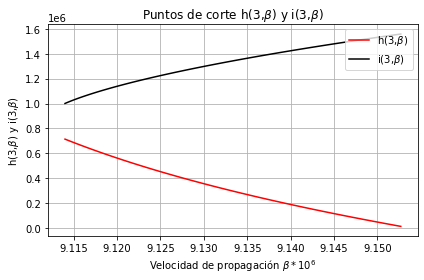

In [19]:
fig, ax = plt.subplots()
#ax.plot(xxx,yyy, label='S(b)', color='green')
ax.plot(xxx_v3,yyy1_v3, label=r'h(3,$\beta$)', color='red')
ax.plot(xxx_v3,yyy2_v3, label=r'i(3,$\beta$)', color='black')
ax.set(xlabel=r'Velocidad de propagación $\beta * 10^{6}$', ylabel=r'h(3,$\beta$) y i(3,$\beta$)',
title=r'Puntos de corte h(3,$\beta$) y i(3,$\beta$)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Puntos de corte HE_v3.png')
plt.show()

Es notorio que no existe ningún punto de corto, por tanto, ya se calcularon todos los modos de propagación posibles para los modos hibridos HE.

## Modos EH

La ecuación de dispersión para los modos hibridos EH es:

$$q_{1} \frac{J_{v}(q_{1}a)}{J_{v+1}(q_{1}a)} = -q_{2} \frac{K_{v}(q_{2}a)}{K_{v+1}(q_{2}a)}$$

Es posible visualizar las raices en los puntos de intersección se estas dos funciones:

$$j(v,\beta) = q_{1} \frac{J_{v}(q_{1}a)}{J_{v+1}(q_{1}a)}$$
$$k(v,\beta) = -q_{2} \frac{K_{v}(q_{2}a)}{K_{v+1}(q_{2}a)}$$

Graficando los puntos de corte para el primer modo angular:

In [20]:
x_EH_v1 = np.linspace(9.114,9.1527,100)
y_EH_v1 = EH(1,x_EH_v1)
y_EH1_v1 = EH_01(1,x_EH_v1)
y_EH2_v1 = EH_02(1,x_EH_v1)

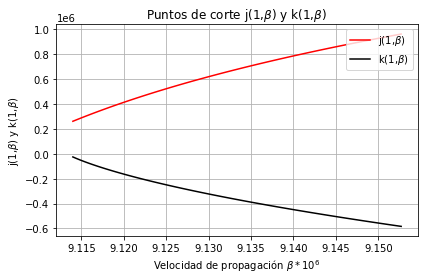

In [21]:
fig, ax = plt.subplots()
#ax.plot(xxx,yyy, label='S(b)', color='green')
ax.plot(x_EH_v1,y_EH1_v1, label=r'j(1,$\beta$)', color='red')
ax.plot(x_EH_v1,y_EH2_v1, label=r'k(1,$\beta$)', color='black')
ax.set(xlabel=r'Velocidad de propagación $\beta * 10^{6}$', ylabel=r'j(1,$\beta$) y k(1,$\beta$)',
title=r'Puntos de corte j(1,$\beta$) y k(1,$\beta$)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Puntos de corte EH_v1.png')
plt.show()

Dado que no existe ningún punto de corte, entonces tampoco hay ningún modo de propagación hibrido EH.

Por tanto los modos de propagación presentes en la fibra óptica son:

$$TE_{01}: n_{eff} =  1.452544813591339$$
$$TM_{01}: n_{eff} =  1.452544813591339$$
$$HE_{11}: n_{eff} = 1.455080723094889$$
$$HE_{21}: n_{eff}= 1.4525448135914436$$

## Modelamiento de campos

En esta sección se modelaran los campos $|\vec{E}|^{2}$, $H_{z}$ y $E_{z}$